In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import pandas as pd

In [7]:
df = pd.read_csv("transformed_data/merged_data_1.csv", index_col="id")
cities = df['city'].unique().tolist()

In [ ]:
df['num_bedrooms'].value_counts().sort_values(ascending=False)        

num_bedrooms
1     36333
2      9290
0      4485
3      1477
4        96
5        10
9        10
6         2
10        2
8         2
Name: count, dtype: int64

In [ ]:
chrome_options = Options()
# chrome_options.add_argument("--headless")
service = ChromeService(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

data = []
city = "Rome"
url = "https://www.airbnb.com/"

driver.get(url)
wait = WebDriverWait(driver, 10)

search_box = wait.until(EC.presence_of_element_located((By.XPATH, "/html/body/div[5]/div/div/div[1]/div/div/div[1]/div[3]/div[1]/div/div/header/form/div[1]/div/div[2]/div[2]/div[1]/div/div[2]/input")))
search_box.send_keys(city)
search_box.send_keys(Keys.RETURN)

search_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[5]/div/div/div[1]/div/div/div[1]/div[3]/div[1]/div/div/header/form/div[1]/div/div[2]/div[3]/button/div/div[2]")))
search_button.click()
try:
    filter_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[5]/div/div/div[1]/div/div/div/div[2]/header/div/div/div/div/form/div[1]/div/div[2]/div[2]/div/div/button/span/span")))
    filter_button.click()
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
except:
    driver.refresh()
# scroll to the down of the page to load all elements

bedrooms_increase = wait.until(EC.element_to_be_clickable((By.XPATH, "//button[@aria-describedby='stepper-filter-item-min_bedrooms-row-title searchFlow-title-label-filter-item-min_bedrooms']")))
bedrooms_increase.click()
bedrooms_increase.click()

apply_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[9]/div/div/section/div/div/div[2]/div/div[2]/footer/div/a")))
apply_button.click()

In [25]:
import time
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

base_url = "https://www.airbnb.com/s/Paris/homes?refinement_paths%5B%5D=%2Fhomes&date_picker_type=calendar&search_type=search_query&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2026-02-01&monthly_length=3&monthly_end_date=2026-05-01&price_filter_input_type=2&channel=EXPLORE&price_filter_num_nights=5&min_bedrooms=3&selected_filter_order%5B%5D=min_bedrooms%3A3&update_selected_filters=false"

options = uc.ChromeOptions()
options.add_argument("--start-maximized")
driver = uc.Chrome(options=options)

all_results = []

try:
    driver.get(base_url)
    wait = WebDriverWait(driver, 20)

    while len(all_results) < 250:
        # Wait for listings to be present
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "div[data-testid='card-container']")))
        time.sleep(5) 

        listings = driver.find_elements(By.CSS_SELECTOR, "div[data-testid='card-container']")
        
        for listing in listings:
            if len(all_results) >= 250: break
            try:
                # 1. Category/Location (e.g., 'Apartment in Batignolles')
                category = listing.find_element(By.CSS_SELECTOR, "div[data-testid='listing-card-subtitle']").text
                
                # 2. Specific Title (e.g., 'Edgar Suites Lemercier...')
                title = listing.find_element(By.CSS_SELECTOR, "div[data-testid='listing-card-title']").text
                
                # 3. Bedrooms/Beds (e.g., '3 bedrooms · 4 beds')
                # This usually appears as the second subtitle line
                details = listing.find_elements(By.CSS_SELECTOR, "div[data-testid='listing-card-subtitle']")[1].text
                
                # 4. Total Price (e.g., '$1,330 for 5 nights')
                # Targeting the specific price container class you provided or similar
                price_text = listing.find_element(By.CSS_SELECTOR, "div.c95t3t6, span._1788770, div._1jo4h71").text
                
                # 5. Superhost Check (Targeting the classes you provided)
                try:
                    listing.find_element(By.CSS_SELECTOR, "span.a8jt5op, div.t1qa5xaj")
                    is_superhost = "Yes"
                except:
                    is_superhost = "No"

                all_results.append({
                    "Title": title,
                    "Category": category,
                    "Details": details,
                    "Price": price_text,
                    "Superhost": is_superhost
                })
                
                print(f"Scraped: {title[:30]}... | {price_text}")

            except Exception:
                continue

        # Pagination
        try:
            next_btn = driver.find_element(By.CSS_SELECTOR, "a[aria-label='Next']")
            driver.execute_script("arguments[0].click();", next_btn)
            time.sleep(5)
        except:
            break

finally:
    print(f"\nTotal collected: {len(all_results)}")
    driver.quit()

Scraped: Apartment in 2nd Arrondissemen... | Apartment in 2nd Arrondissement
NoChichi Collections - 3BDR/8PAX - Montorgueil IV
Business host
Business host
Feb 1 – 6
Feb 1 – 6
1,538 CHF total
Show price breakdown
 1,538 CHF total
Scraped: Apartment in Paris... | Apartment in Paris
Modern 3BR - Large Layout - Avenue Victor Hugo
3 bedrooms
3 bedrooms
3 beds
,
 · 3 beds
Feb 22 – 27
Feb 22 – 27
1,832 CHF total
Show price breakdown
 1,832 CHF total
New place to stay
New
Scraped: Apartment in 2nd Arrondissemen... | Apartment in 2nd Arrondissement
Magnificent apartment in the heart of Paris
Business host
Business host
Feb 1 – 6
Feb 1 – 6
2,437 CHF
1,574 CHF total
Show price breakdown
 4.9 out of 5 average rating, 143 reviews
4.9 (143)
Scraped: Apartment in Paris... | Apartment in Paris
Montmartre Chic • Luxury 3BR/8Pax • A/C
Business host
Business host
Feb 1 – 6
Feb 1 – 6
1,282 CHF total
Show price breakdown
 1,282 CHF total
5.0 out of 5 average rating, 11 reviews
5.0 (11)
Scraped: Apartment i

In [31]:
all_results = pd.DataFrame(all_results)

In [36]:
all_results

,Title,Category,Details,Price,Superhost
0,Apartment in 2nd Arrondissement,,NoChichi Collections - 3BDR/8PAX - Montorgueil IV,Apartment in 2nd Arrondissement\nNoChichi Coll...,Yes
1,Apartment in Paris,,Modern 3BR - Large Layout - Avenue Victor Hugo,Apartment in Paris\nModern 3BR - Large Layout ...,Yes
2,Apartment in 2nd Arrondissement,,Magnificent apartment in the heart of Paris,Apartment in 2nd Arrondissement\nMagnificent a...,Yes
3,Apartment in Paris,,Montmartre Chic • Luxury 3BR/8Pax • A/C,Apartment in Paris\nMontmartre Chic • Luxury 3...,Yes
4,Apartment in Paris,,# 8people # 4Bedrooms # Wagram # AC # Paris 8,Apartment in Paris\n# 8people # 4Bedrooms # Wa...,Yes
...,...,...,...,...,...
245,Apartment in 3rd Arrondissement,,"Charming family flat for 6, A/C, Central Le Ma...",Apartment in 3rd Arrondissement\nCharming fami...,Yes
246,Home in 8th Arrondissement of Paris,,A house on the Champs-Elysées,Home in 8th Arrondissement of Paris\nA house o...,Yes
247,Apartment in 11th Arrondissement,,Loft with glass roof near Père Lachaise cemetery,Apartment in 11th Arrondissement\nLoft with gl...,Yes
248,Apartment in 5th Arrondissement,,Charming apartment 2 steps from Notre Dame,Apartment in 5th Arrondissement\nCharming apar...,Yes


In [32]:
all_results.columns

Index(['Title', 'Category', 'Details', 'Price', 'Superhost'], dtype='object')

In [35]:
all_results.Price.unique()

array(['Apartment in 2nd Arrondissement\nNoChichi Collections - 3BDR/8PAX - Montorgueil IV\nBusiness host\nBusiness host\nFeb 1\u2009–\u20096\nFeb 1\u2009–\u20096\n1,538 CHF total\nShow price breakdown\n 1,538 CHF total',
       'Apartment in Paris\nModern 3BR - Large Layout - Avenue Victor Hugo\n3 bedrooms\n3 bedrooms\n3 beds\n,\n · 3 beds\nFeb 22\u2009–\u200927\nFeb 22\u2009–\u200927\n1,832 CHF total\nShow price breakdown\n 1,832 CHF total\nNew place to stay\nNew',
       'Apartment in 2nd Arrondissement\nMagnificent apartment in the heart of Paris\nBusiness host\nBusiness host\nFeb 1\u2009–\u20096\nFeb 1\u2009–\u20096\n2,437 CHF\n1,574 CHF total\nShow price breakdown\n 4.9 out of 5 average rating, 143 reviews\n4.9 (143)',
       'Apartment in Paris\nMontmartre Chic • Luxury 3BR/8Pax • A/C\nBusiness host\nBusiness host\nFeb 1\u2009–\u20096\nFeb 1\u2009–\u20096\n1,282 CHF total\nShow price breakdown\n 1,282 CHF total\n5.0 out of 5 average rating, 11 reviews\n5.0 (11)',
       'Apartme

In [34]:
all_results.Details

0      NoChichi Collections - 3BDR/8PAX - Montorgueil IV
1         Modern 3BR - Large Layout - Avenue Victor Hugo
2            Magnificent apartment in the heart of Paris
3                Montmartre Chic • Luxury 3BR/8Pax • A/C
4          # 8people # 4Bedrooms # Wagram # AC # Paris 8
                             ...                        
245    Charming family flat for 6, A/C, Central Le Ma...
246                        A house on the Champs-Elysées
247     Loft with glass roof near Père Lachaise cemetery
248           Charming apartment 2 steps from Notre Dame
249                Elegant apartment - 3BR-8P- Le Marais
Name: Details, Length: 250, dtype: object

In [37]:
import time
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Target URL for 3-bedroom Paris homes
URL = "https://www.airbnb.com/s/Paris/homes?refinement_paths%5B%5D=%2Fhomes&date_picker_type=calendar&search_type=search_query&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2026-02-01&monthly_length=3&monthly_end_date=2026-05-01&price_filter_input_type=2&channel=EXPLORE&price_filter_num_nights=5&min_bedrooms=3&selected_filter_order%5B%5D=min_bedrooms%3A3&update_selected_filters=false"

options = uc.ChromeOptions()
options.add_argument("--start-maximized")
driver = uc.Chrome(options=options)

all_data = []
target_count = 250

try:
    driver.get(URL)
    wait = WebDriverWait(driver, 20)

    while len(all_data) < target_count:
        # Wait for listings to load in the DOM
        wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div[data-testid='card-container']")))
        
        # Mimic human scrolling to ensure all data renders
        actions = ActionChains(driver)
        actions.scroll_by_amount(0, 1000).perform()
        time.sleep(3)

        listings = driver.find_elements(By.CSS_SELECTOR, "div[data-testid='card-container']")
        
        for listing in listings:
            if len(all_data) >= target_count:
                break
            try:
                # 1. Extract Name (Listing Title)
                name = listing.find_element(By.CSS_SELECTOR, "div[data-testid='listing-card-title']").text
                
                # 2. Extract Price (Filtering for just the current price)
                # Targeting the specific u1opajno class or generic price containers
                price_element = listing.find_element(By.CSS_SELECTOR, "span.u1opajno, span._1y74z8u, div._1jo4h71")
                price = price_element.text
                
                # 3. Superhost Check
                # Using the specific classes you provided: a8jt5op and t1qa5xaj
                try:
                    listing.find_element(By.CSS_SELECTOR, "span.a8jt5op, div.t1qa5xaj")
                    is_superhost = "Yes"
                except:
                    is_superhost = "No"

                all_data.append({
                    "Name": name,
                    "Price": price,
                    "Superhost": is_superhost
                })
                
                print(f"[{len(all_data)}] {is_superhost} | {price} | {name[:40]}")

            except Exception:
                continue

        # Pagination: Navigate to next results until target is met
        if len(all_data) < target_count:
            try:
                next_button = driver.find_element(By.CSS_SELECTOR, "a[aria-label='Next']")
                driver.execute_script("arguments[0].click();", next_button)
                time.sleep(5) # Wait for page transition
            except:
                print("Pagination ended.")
                break

finally:
    print(f"\nFinal count: {len(all_data)}")
    driver.quit()

[1] Yes | 1,895 CHF | Apartment in Le Marais
[2] Yes | 1,574 CHF | Apartment in 2nd Arrondissement
[3] Yes | 1,401 CHF | Apartment in 1st Arrondissement
[4] Yes | 1,800 CHF | Apartment in 3rd Arrondissement
[5] Yes | 1,532 CHF | Apartment in 8th Arrondissement of Paris
[6] Yes | 1,725 CHF | Apartment in 3rd Arrondissement
[7] Yes | 1,523 CHF | Apartment in 18th Arrondissement
[8] Yes | 1,248 CHF | Apartment in 10th Arrondissement
[9] Yes | 2,964 CHF | Apartment in 3rd Arrondissement
[10] Yes | 3,326 CHF | Loft in Le Marais
[11] Yes | 2,937 CHF | Apartment in 2nd Arrondissement
[12] Yes | 2,701 CHF | Apartment in 1st Arrondissement
[13] Yes | 1,438 CHF | Apartment in 2nd Arrondissement
[14] Yes | 1,230 CHF | Apartment in 3rd Arrondissement
[15] Yes | 1,657 CHF | Apartment in 2nd Arrondissement
[16] Yes | 983 CHF | Apartment in 11th Arrondissement
[17] Yes | 1,811 CHF | Home in Paris
[18] Yes | 1,598 CHF | Apartment in Saint-Germain-Des-Prés
[19] Yes | 2,353 CHF | Apartment in 2nd Arrond

KeyboardInterrupt: 

In [38]:
import time
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

URL = "https://www.airbnb.com/s/Paris/homes?refinement_paths%5B%5D=%2Fhomes&date_picker_type=calendar&search_type=search_query&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2026-02-01&monthly_length=3&monthly_end_date=2026-05-01&price_filter_input_type=2&channel=EXPLORE&price_filter_num_nights=5&min_bedrooms=3&selected_filter_order%5B%5D=min_bedrooms%3A3&update_selected_filters=false"

options = uc.ChromeOptions()
options.add_argument("--start-maximized")
driver = uc.Chrome(options=options)

all_data = []
target_count = 250

try:
    driver.get(URL)
    wait = WebDriverWait(driver, 20)

    while len(all_data) < target_count:
        # Wait for listings to load
        wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div[data-testid='card-container']")))
        
        # Scroll to load dynamic data, similar to your Java image request
        ActionChains(driver).scroll_by_amount(0, 1000).perform()
        time.sleep(4) 

        # Capture all cards on the current page
        listings = driver.find_elements(By.CSS_SELECTOR, "div[data-testid='card-container']")
        
        for listing in listings:
            if len(all_data) >= target_count:
                break
            try:
                # 1. Extract Name
                name = listing.find_element(By.CSS_SELECTOR, "div[data-testid='listing-card-title']").text
                
                # 2. Extract Price (Targeting only the numerical span you provided)
                price = listing.find_element(By.CSS_SELECTOR, "span.u1opajno").text
                
                # 3. FIXED SUPERHOST LOGIC
                # We search specifically for the text 'Superhost' ONLY inside this 'listing' element
                inner_text = listing.text # Get all text visible in this card only
                if "Superhost" in inner_text:
                    is_superhost = "Yes"
                else:
                    is_superhost = "No"

                all_data.append({
                    "Name": name,
                    "Price": price,
                    "Superhost": is_superhost
                })
                
                print(f"[{len(all_data)}] Superhost: {is_superhost} | Price: {price} | Name: {name[:30]}...")

            except Exception:
                continue

        # 4. Pagination
        if len(all_data) < target_count:
            try:
                next_button = driver.find_element(By.CSS_SELECTOR, "a[aria-label='Next']")
                driver.execute_script("arguments[0].click();", next_button)
                time.sleep(5)
            except:
                break

finally:
    print(f"\nFinal count: {len(all_data)}")
    driver.quit()

[1] Superhost: No | Price: 1,895 CHF | Name: Apartment in Le Marais...
[2] Superhost: Yes | Price: 1,574 CHF | Name: Apartment in 2nd Arrondissemen...
[3] Superhost: No | Price: 1,401 CHF | Name: Apartment in 1st Arrondissemen...
[4] Superhost: Yes | Price: 1,800 CHF | Name: Apartment in 3rd Arrondissemen...
[5] Superhost: No | Price: 1,532 CHF | Name: Apartment in 8th Arrondissemen...
[6] Superhost: No | Price: 1,725 CHF | Name: Apartment in 3rd Arrondissemen...
[7] Superhost: No | Price: 1,523 CHF | Name: Apartment in 18th Arrondisseme...
[8] Superhost: No | Price: 1,248 CHF | Name: Apartment in 10th Arrondisseme...
[9] Superhost: No | Price: 2,964 CHF | Name: Apartment in 3rd Arrondissemen...
[10] Superhost: No | Price: 3,326 CHF | Name: Loft in Le Marais...
[11] Superhost: No | Price: 2,937 CHF | Name: Apartment in 2nd Arrondissemen...
[12] Superhost: No | Price: 2,701 CHF | Name: Apartment in 1st Arrondissemen...
[13] Superhost: No | Price: 1,438 CHF | Name: Apartment in 2nd Arron

ReadTimeoutError: HTTPConnectionPool(host='localhost', port=59120): Read timed out. (read timeout=120)

In [39]:
all_data = pd.DataFrame(all_data)
all_data

,Name,Price,Superhost
0,Apartment in Le Marais,"1,895 CHF",No
1,Apartment in 2nd Arrondissement,"1,574 CHF",Yes
2,Apartment in 1st Arrondissement,"1,401 CHF",No
3,Apartment in 3rd Arrondissement,"1,800 CHF",Yes
4,Apartment in 8th Arrondissement of Paris,"1,532 CHF",No
...,...,...,...
86,Home in 5th Arrondissement,"2,227 CHF",No
87,Apartment in 2nd Arrondissement,"1,809 CHF",Yes
88,Apartment in 1st Arrondissement,"1,533 CHF",No
89,Apartment in 11th Arrondissement,"1,652 CHF",No


In [41]:
all_data['Superhost'].value_counts()

Superhost
No     78
Yes    13
Name: count, dtype: int64

Text(0.5, 1.0, 'Price Comparison between Superhosts and Non-Superhosts')

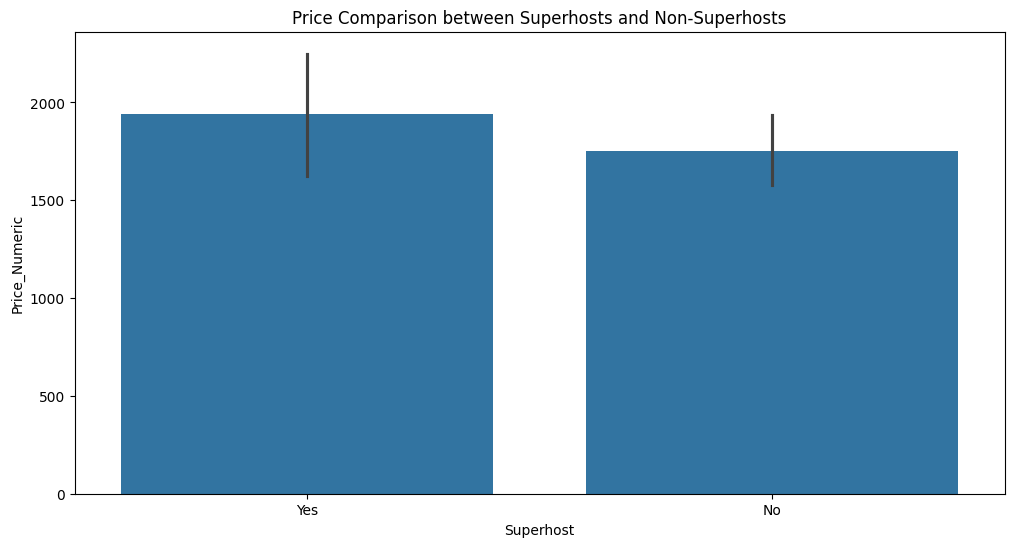

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert 'Price' to numeric for plotting
all_data['Price_Numeric'] = all_data['Price'].str.replace(' CHF', '').str.replace(',', '').astype(float)
# take sample
sample_size = 13
superhost_sample = all_data[all_data['Superhost'] == 'Yes'].sample(n=sample_size, random_state=1)
non_superhost_sample = all_data[all_data['Superhost'] == 'No'].sample(n=sample_size, random_state=1)
#graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Superhost', y='Price_Numeric', data=pd.concat([superhost_sample, non_superhost_sample]))
plt.title('Price Comparison between Superhosts and Non-Superhosts')